In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import patoolib

In [4]:
patoolib.extract_archive("..\\data\\unrar\\Cartografia-ZEC.rar", outdir="..\\data\\unrar\\")

INFO patool: Extracting ..\data\unrar\Cartografia-ZEC.rar ...
INFO patool: running "C:\Program Files\WinRAR\rar.EXE" x -- c:\Users\jcge9\Documents\QGIS_IDECanarias_data\data\unrar\Cartografia-ZEC.rar
INFO patool:     with cwd=..\data\unrar\, creationflags=134217728, input=
INFO patool: ... ..\data\unrar\Cartografia-ZEC.rar extracted to `..\data\unrar\'.


'..\\data\\unrar\\'

In [5]:
islas_canarias = gpd.read_file("..\\data\\islas_generalizadas.shp") 
eennpp = gpd.read_file("..\\data\\eennpp.shp")
zec_zonificacion = gpd.read_file("..\\data\\IC_n2000_ZECZonificacion.shp")
zec_delimitacion = gpd.read_file("..\\data\\unrar\\ZEC.shp")

<Axes: >

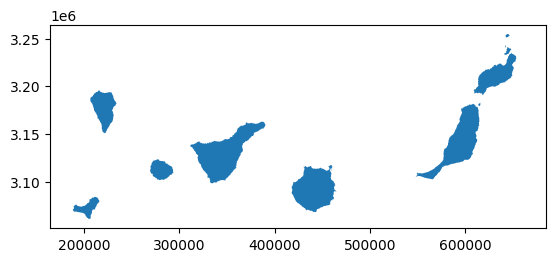

In [6]:
islas_canarias.plot()

<Axes: >

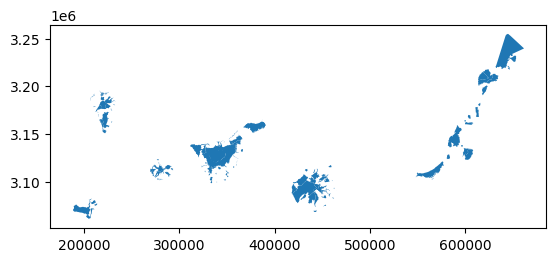

In [7]:
eennpp.plot()

<Axes: >

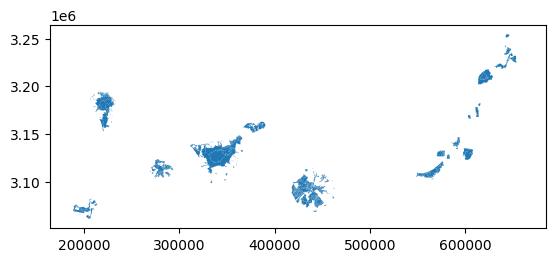

In [8]:
zec_zonificacion.plot()

<Axes: >

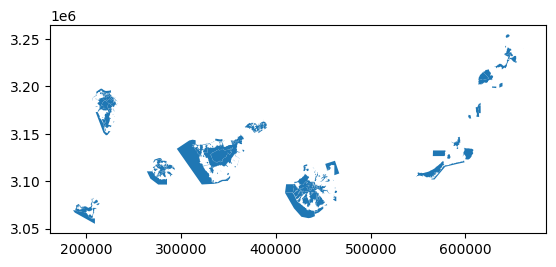

In [9]:
zec_delimitacion.plot()

In [10]:
islas_canarias.head()

,nombre,geometry
0,FUERTEVENTURA,"POLYGON ((614400.417 3179644.575, 614046.617 3..."
1,FUERTEVENTURA,"POLYGON ((589085.283 3152305.979, 589312.973 3..."
2,EL HIERRO,"POLYGON ((205260.539 3081076.767, 205665.090 3..."
3,TENERIFE,"POLYGON ((338109.671 3142160.390, 338626.550 3..."
4,LANZAROTE,"POLYGON ((645049.534 3254822.134, 645270.045 3..."


In [11]:
gran_canaria_filtro = islas_canarias["nombre"] == "GRAN CANARIA"
gran_canaria = islas_canarias[gran_canaria_filtro] 
gran_canaria.head()

,nombre,geometry
10,GRAN CANARIA,"POLYGON ((430739.466 3110342.654, 430337.649 3..."


In [12]:
eennpp_gran_canaria = gpd.overlay(gran_canaria, eennpp, how="intersection")
eennpp_gran_canaria.head()

,nombre_1,codigo,categoria,nombre_2,geometry
0,GRAN CANARIA,C-32,Sitio de Interés Científico,Juncalillo del Sur,"POLYGON ((453798.899 3074595.226, 453793.872 3..."
1,GRAN CANARIA,C-30,Sitio de Interés Científico,Tufia,"POLYGON ((462351.057 3093372.615, 462349.888 3..."
2,GRAN CANARIA,C-29,Sitio de Interés Científico,Jinámar,"POLYGON ((460090.710 3101449.938, 460091.824 3..."
3,GRAN CANARIA,C-28,Paisaje Protegido,Montaña de Agüimes,"POLYGON ((458220.210 3087278.704, 458221.376 3..."
4,GRAN CANARIA,C-27,Paisaje Protegido,Fataga,"POLYGON ((443008.928 3089020.992, 443007.250 3..."


<Axes: >

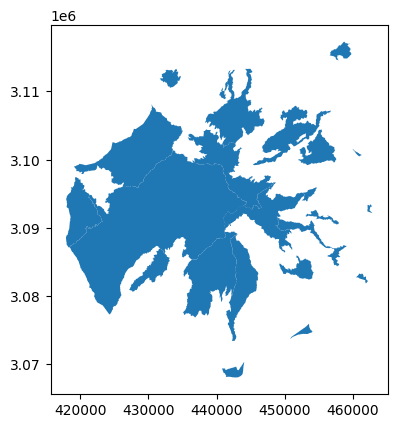

In [13]:
eennpp_gran_canaria = gpd.overlay(gran_canaria, eennpp, how="intersection")
eennpp_gran_canaria.plot()

<Axes: >

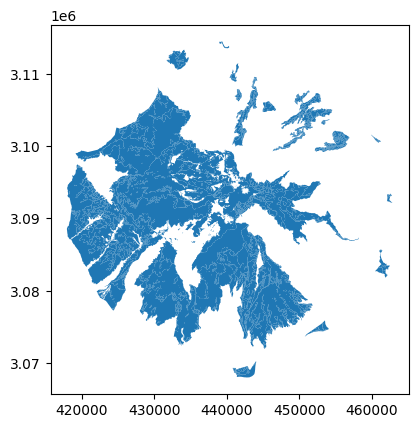

In [14]:
zec_zonificacion_gran_canaria = gpd.overlay(gran_canaria, zec_zonificacion, how="intersection")
#zec_zonificacion.head()
zec_zonificacion_gran_canaria.plot()

<Axes: >

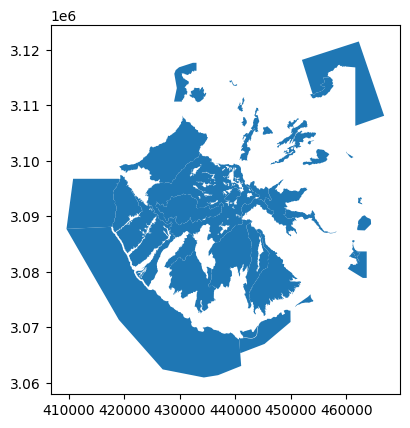

In [21]:
zec_delimitacion_gc_filtro = zec_delimitacion["ISLA"] == "Gran Canaria"
zec_delimitacion_gc = zec_delimitacion[zec_delimitacion_gc_filtro]
zec_delimitacion_gc.plot()

In [22]:
## Descargamos los datos crea una carpeta llamada gran_canaria en data
gran_canaria.to_file("..\\data\\gran_canaria\\gran_canaria_generalizada.shp")
eennpp_gran_canaria.to_file("..\\data\\gran_canaria\\eennpp_gran_canaria.shp")
zec_zonificacion_gran_canaria.to_file("..\\data\\gran_canaria\\zec_zonificacion_gc.shp")
zec_delimitacion_gc.to_file("..\\data\\gran_canaria\\zec_delimitacion_gc.shp")

# Calculadora para calcular coordenadas de distintos tipos

In [39]:
from pyproj import Proj, transform
import warnings; warnings.filterwarnings("ignore")

# Coordenadas en grados decimales
lat, lon = 28.042306, -15.471167

# Definir la proyección deseada (WGS 1984 / UTM Zone 28N para Canarias)
proyeccion_deseada = Proj(init="epsg:32628")

# Transformar las coordenadas
x, y = transform(Proj(init="epsg:4326"), proyeccion_deseada, lon, lat)

# Imprimir las coordenadas transformadas
print(
f"""Coordenadas en grados decimales: {lat}, {lon}
Coordenadas transformadas: {int(x)}, {int(y)}"""
    )

Coordenadas en grados decimales: 28.042306, -15.471167
Coordenadas transformadas: 453691, 3101978


Coordenadas en grados decimales: 28.042306, -15.471167
Coordenadas transformadas: 453691, 3101978